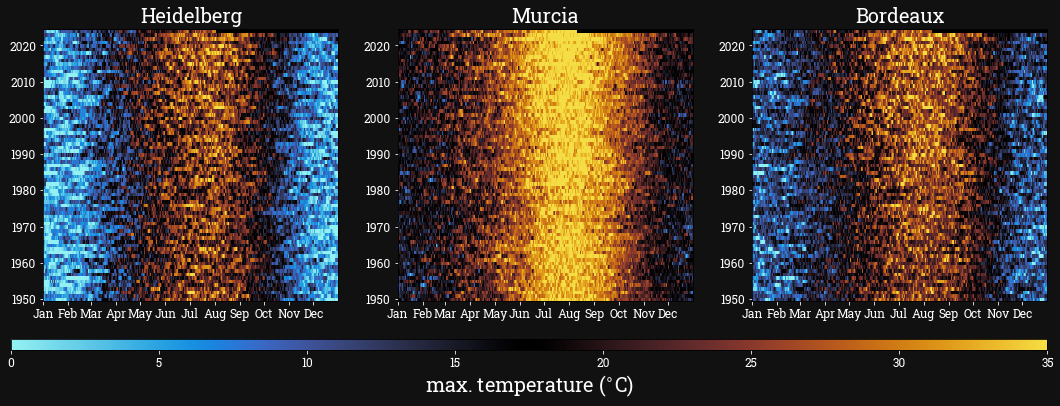

In [1]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from meteostat import Point, Daily
import numpy as np
import cmasher as cmr

import matplotlib as mpl
COLOR = 'w'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# Font
fontUrl = 'https://github.com/googlefonts/robotoslab/raw/main/fonts/ttf/RobotoSlab-Medium.ttf'
import urllib.request
urllib.request.urlretrieve(fontUrl, fontUrl.split('/')[-1])

from matplotlib import font_manager
font_dirs = ['.']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
# set font
plt.rcParams['font.family'] = 'Roboto Slab'

SMALL_SIZE = 12
MEDIUM_SIZE = 20
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels




cities = [ Point(49.398750, 8.672434, 114) ,
           Point(37.9922,-1.1307, 43), 
           Point(44.7743, -0.6189, 10) ]

titles = ['Heidelberg', 'Murcia', 'Bordeaux']


fig = plt.figure(figsize=(18,5.),facecolor='#111111')

for iii,city in enumerate(cities):

    for yyy in np.arange(1950,2025,1):
        #if yyy%10==0:
        #    print(iii,yyy)

        # Set time period
        start = datetime(yyy, 1, 1)
        end = datetime(yyy, 12, 31)

        # Get daily data for 2018
        data = Daily(city, start, end)
        data = data.fetch()

        tmax = data['tmax'].tolist()
        day = [foo for foo in range(len(tmax))]
        plt.subplot( 1 , 3, iii+1 , facecolor='k')
        scatter = plt.scatter( day , [yyy for ddd in day] , c=tmax , vmin=0, vmax=35, s=8, cmap=cmr.iceburn,marker='s')
        plt.xlim(0,364.9)
        plt.ylim(1949.5,2024.5)
        plt.title(titles[iii],fontsize=20)
        
        # Set the locator
        locator = mdates.MonthLocator()  # every month
        # Specify the format - %b gives us Jan, Feb...
        fmt = mdates.DateFormatter('%b')
        X = plt.gca().xaxis
        X.set_major_locator(locator)
        # Specify formatter
        X.set_major_formatter(fmt)

cbar_ax = fig.add_axes([0.1, -0.01, 0.8, 0.03])
fig.colorbar(scatter, cax=cbar_ax, ticks=[0,5,10,15,20,25,30,35], orientation='horizontal',label='max. temperature ($^{\circ}$C)')
plt.savefig('max_temp_1950_2024.png',bbox_inches='tight',dpi=150)